In [ ]:
# importing libraries
# https://www.kaggle.com/competitions/spaceship-titanic/data 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("drive/MyDrive/GoogleColab/Spaceship_Titanic/train.csv")
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
Transported = df["Transported"]
Transported

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

In [ ]:
df.drop(["Transported","Name"],axis=1, inplace = True)
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0


In [ ]:
df.shape

(8693, 12)

In [ ]:
test_ds = pd.read_csv("drive/MyDrive/GoogleColab/Spaceship_Titanic/test.csv")
test_ds.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [ ]:
test_PassengerId = test_ds["PassengerId"]
test_PassengerId

0       0013_01
1       0018_01
2       0019_01
3       0021_01
4       0023_01
         ...   
4272    9266_02
4273    9269_01
4274    9271_01
4275    9273_01
4276    9277_01
Name: PassengerId, Length: 4277, dtype: object

In [ ]:
test_ds.drop(["Name"],axis=1, inplace = True)
test_ds

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0


In [ ]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
dtypes: float64(6), object(6)
memory usage: 815.1+ KB


In [ ]:
len(df["PassengerId"].unique())


8693

In [ ]:

len(df["Cabin"].unique())


6561

In [ ]:
df["HomePlanet"].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [ ]:
homePlanet_dict = {'Europa':1, 'Earth':2, 'Mars':3, 'nan':0}


In [ ]:
df["HomePlanet"] = df.HomePlanet.map(homePlanet_dict)
test_ds["HomePlanet"] = test_ds.HomePlanet.map(homePlanet_dict)


In [ ]:
print(df["HomePlanet"])

0       1.0
1       2.0
2       1.0
3       1.0
4       2.0
       ... 
8688    1.0
8689    2.0
8690    2.0
8691    1.0
8692    1.0
Name: HomePlanet, Length: 8693, dtype: float64


In [ ]:
df["HomePlanet"].unique()

array([ 1.,  2.,  3., nan])

In [ ]:
df['HomePlanet'].isnull().sum()

201

In [ ]:
df = df.fillna(df.mode().iloc[0])
test_ds = test_ds.fillna(test_ds.mode().iloc[0])


In [ ]:
df['HomePlanet']

0       1.0
1       2.0
2       1.0
3       1.0
4       2.0
       ... 
8688    1.0
8689    2.0
8690    2.0
8691    1.0
8692    1.0
Name: HomePlanet, Length: 8693, dtype: float64

In [ ]:
df['HomePlanet'].isnull().sum()

0

In [ ]:
df["HomePlanet"].unique()

array([1., 2., 3.])

In [ ]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   float64
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
dtypes: bool(2), float64(7), object(3)
memory usage: 696.2+ KB


In [ ]:
df["HomePlanet"].unique()

array([1., 2., 3.])

In [ ]:
df['HomePlanet'] = df['HomePlanet'].astype(int)
test_ds['HomePlanet'] = test_ds['HomePlanet'].astype(int)

df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0001_01,1,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0
1,0002_01,2,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0
2,0003_01,1,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0
3,0003_02,1,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0
4,0004_01,2,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0


In [ ]:
df["Destination"].unique()


array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e'], dtype=object)

In [ ]:
destination_dict = {'TRAPPIST-1e':1, 'PSO J318.5-22':2, '55 Cancri e':3}


In [ ]:
df["Destination"] = df.Destination.map(destination_dict)

test_ds["Destination"] = test_ds.Destination.map(destination_dict)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   int64  
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   int64  
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
dtypes: bool(2), float64(6), int64(2), object(2)
memory usage: 696.2+ KB


In [ ]:
print(df.Cabin)

0          B/0/P
1          F/0/S
2          A/0/S
3          A/0/S
4          F/1/S
          ...   
8688      A/98/P
8689    G/1499/S
8690    G/1500/S
8691     E/608/S
8692     E/608/S
Name: Cabin, Length: 8693, dtype: object


In [ ]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0001_01,1,False,B/0/P,1,39.0,False,0.0,0.0,0.0,0.0,0.0
1,0002_01,2,False,F/0/S,1,24.0,False,109.0,9.0,25.0,549.0,44.0
2,0003_01,1,False,A/0/S,1,58.0,True,43.0,3576.0,0.0,6715.0,49.0
3,0003_02,1,False,A/0/S,1,33.0,False,0.0,1283.0,371.0,3329.0,193.0
4,0004_01,2,False,F/1/S,1,16.0,False,303.0,70.0,151.0,565.0,2.0


In [ ]:
xx = pd.DataFrame(df.Cabin.str.split('/').tolist(),columns = ['cabin_deck','cabin_num','cabin_side'])
xx


,cabin_deck,cabin_num,cabin_side
0,B,0,P
1,F,0,S
2,A,0,S
3,A,0,S
4,F,1,S
...,...,...,...
8688,A,98,P
8689,G,1499,S
8690,G,1500,S
8691,E,608,S


In [ ]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0001_01,1,False,B/0/P,1,39.0,False,0.0,0.0,0.0,0.0,0.0
1,0002_01,2,False,F/0/S,1,24.0,False,109.0,9.0,25.0,549.0,44.0
2,0003_01,1,False,A/0/S,1,58.0,True,43.0,3576.0,0.0,6715.0,49.0
3,0003_02,1,False,A/0/S,1,33.0,False,0.0,1283.0,371.0,3329.0,193.0
4,0004_01,2,False,F/1/S,1,16.0,False,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1,False,A/98/P,3,41.0,True,0.0,6819.0,0.0,1643.0,74.0
8689,9278_01,2,True,G/1499/S,2,18.0,False,0.0,0.0,0.0,0.0,0.0
8690,9279_01,2,False,G/1500/S,1,26.0,False,0.0,0.0,1872.0,1.0,0.0
8691,9280_01,1,False,E/608/S,3,32.0,False,0.0,1049.0,0.0,353.0,3235.0


In [ ]:
df['cabin_deck'] = xx.cabin_deck
test_ds['cabin_deck'] = xx.cabin_deck

df['cabin_num'] = xx.cabin_num
test_ds['cabin_num'] = xx.cabin_num

df['cabin_side'] = xx.cabin_side
test_ds['cabin_side'] = xx.cabin_side

df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,cabin_deck,cabin_num,cabin_side
0,0001_01,1,False,B/0/P,1,39.0,False,0.0,0.0,0.0,0.0,0.0,B,0,P
1,0002_01,2,False,F/0/S,1,24.0,False,109.0,9.0,25.0,549.0,44.0,F,0,S
2,0003_01,1,False,A/0/S,1,58.0,True,43.0,3576.0,0.0,6715.0,49.0,A,0,S
3,0003_02,1,False,A/0/S,1,33.0,False,0.0,1283.0,371.0,3329.0,193.0,A,0,S
4,0004_01,2,False,F/1/S,1,16.0,False,303.0,70.0,151.0,565.0,2.0,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1,False,A/98/P,3,41.0,True,0.0,6819.0,0.0,1643.0,74.0,A,98,P
8689,9278_01,2,True,G/1499/S,2,18.0,False,0.0,0.0,0.0,0.0,0.0,G,1499,S
8690,9279_01,2,False,G/1500/S,1,26.0,False,0.0,0.0,1872.0,1.0,0.0,G,1500,S
8691,9280_01,1,False,E/608/S,3,32.0,False,0.0,1049.0,0.0,353.0,3235.0,E,608,S


In [ ]:
df['cabin_deck'].unique()

array(['B', 'F', 'A', 'G', 'E', 'D', 'C', 'T'], dtype=object)

In [ ]:
len(df['cabin_num'].unique())

1817

In [ ]:
df['cabin_side'].unique()

array(['P', 'S'], dtype=object)

In [ ]:
'''df.plot(kind = 'bar')
plt.ylabel('RoomService')
plt.xlabel('PassengerId')
plt.title('histogram')
plt.show()'''

"df.plot(kind = 'bar')\nplt.ylabel('RoomService')\nplt.xlabel('PassengerId')\nplt.title('histogram')\nplt.show()"

(array([ 591.,  649., 2089., 2155., 1350.,  893.,  536.,  294.,  106.,
          30.]),
 array([ 0. ,  7.9, 15.8, 23.7, 31.6, 39.5, 47.4, 55.3, 63.2, 71.1, 79. ]),
 <a list of 10 Patch objects>)

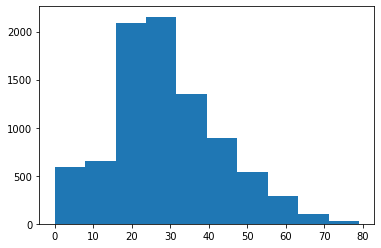

In [ ]:
plt.hist(df['Age'])

In [ ]:
def ageFun(age_c):
    if(age_c<17):
        return 1
    elif(age_c>17 and age_c<=31):
        return 2
    elif(age_c>31 and age_c<=40):
        return 3
    elif(age_c>40 and age_c<=47):
        return 4
    elif(age_c>47 and age_c<=55):
        return 5
    elif(age_c>55 and age_c<=63):
        return 6 
    elif(age_c>63 and age_c<=71):
        return 7 
    elif(age_c>71 and age_c<=78):
        return 8 
    else:
        return 0

In [ ]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,cabin_deck,cabin_num,cabin_side
0,0001_01,1,False,B/0/P,1,39.0,False,0.0,0.0,0.0,0.0,0.0,B,0,P
1,0002_01,2,False,F/0/S,1,24.0,False,109.0,9.0,25.0,549.0,44.0,F,0,S
2,0003_01,1,False,A/0/S,1,58.0,True,43.0,3576.0,0.0,6715.0,49.0,A,0,S
3,0003_02,1,False,A/0/S,1,33.0,False,0.0,1283.0,371.0,3329.0,193.0,A,0,S
4,0004_01,2,False,F/1/S,1,16.0,False,303.0,70.0,151.0,565.0,2.0,F,1,S


In [ ]:
df.drop(["CryoSleep","Cabin"],axis=1, inplace = True)
test_ds.drop(["CryoSleep","Cabin"],axis=1, inplace = True)
df.head()

,PassengerId,HomePlanet,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,cabin_deck,cabin_num,cabin_side
0,0001_01,1,1,39.0,False,0.0,0.0,0.0,0.0,0.0,B,0,P
1,0002_01,2,1,24.0,False,109.0,9.0,25.0,549.0,44.0,F,0,S
2,0003_01,1,1,58.0,True,43.0,3576.0,0.0,6715.0,49.0,A,0,S
3,0003_02,1,1,33.0,False,0.0,1283.0,371.0,3329.0,193.0,A,0,S
4,0004_01,2,1,16.0,False,303.0,70.0,151.0,565.0,2.0,F,1,S


In [ ]:
#df['VIP'].unique()

In [ ]:
#vip_dict = {False:1, True:2}

In [ ]:
#df["VIP_bool"] = df.VIP.map(vip_dict)

In [ ]:
df["VIP"] = df["VIP"].astype(int)
test_ds["VIP"] = test_ds["VIP"].astype(int)
df.head()

,PassengerId,HomePlanet,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,cabin_deck,cabin_num,cabin_side
0,0001_01,1,1,39.0,0,0.0,0.0,0.0,0.0,0.0,B,0,P
1,0002_01,2,1,24.0,0,109.0,9.0,25.0,549.0,44.0,F,0,S
2,0003_01,1,1,58.0,1,43.0,3576.0,0.0,6715.0,49.0,A,0,S
3,0003_02,1,1,33.0,0,0.0,1283.0,371.0,3329.0,193.0,A,0,S
4,0004_01,2,1,16.0,0,303.0,70.0,151.0,565.0,2.0,F,1,S


In [ ]:
df['cabin_side'].unique()

array(['P', 'S'], dtype=object)

In [ ]:
cabin_side_dict = {'P':1,'S':2};

In [ ]:
df['cabin_side'] = df.cabin_side.map(cabin_side_dict)
test_ds['cabin_side'] = test_ds.cabin_side.map(cabin_side_dict)
df

,PassengerId,HomePlanet,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,cabin_deck,cabin_num,cabin_side
0,0001_01,1,1,39.0,0,0.0,0.0,0.0,0.0,0.0,B,0,1
1,0002_01,2,1,24.0,0,109.0,9.0,25.0,549.0,44.0,F,0,2
2,0003_01,1,1,58.0,1,43.0,3576.0,0.0,6715.0,49.0,A,0,2
3,0003_02,1,1,33.0,0,0.0,1283.0,371.0,3329.0,193.0,A,0,2
4,0004_01,2,1,16.0,0,303.0,70.0,151.0,565.0,2.0,F,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1,3,41.0,1,0.0,6819.0,0.0,1643.0,74.0,A,98,1
8689,9278_01,2,2,18.0,0,0.0,0.0,0.0,0.0,0.0,G,1499,2
8690,9279_01,2,1,26.0,0,0.0,0.0,1872.0,1.0,0.0,G,1500,2
8691,9280_01,1,3,32.0,0,0.0,1049.0,0.0,353.0,3235.0,E,608,2


In [ ]:
df['cabin_deck'].unique()

array(['B', 'F', 'A', 'G', 'E', 'D', 'C', 'T'], dtype=object)

In [ ]:
cabin_deck_dict = {'B':1, 'F':2, 'A':3, 'G':4, 'E':5, 'D':6, 'C':7, 'T':8};

In [ ]:
df['cabin_deck'] = df.cabin_deck.map(cabin_deck_dict)
test_ds['cabin_deck'] = test_ds.cabin_deck.map(cabin_deck_dict)


In [ ]:
df.head()

,PassengerId,HomePlanet,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,cabin_deck,cabin_num,cabin_side
0,0001_01,1,1,39.0,0,0.0,0.0,0.0,0.0,0.0,1,0,1
1,0002_01,2,1,24.0,0,109.0,9.0,25.0,549.0,44.0,2,0,2
2,0003_01,1,1,58.0,1,43.0,3576.0,0.0,6715.0,49.0,3,0,2
3,0003_02,1,1,33.0,0,0.0,1283.0,371.0,3329.0,193.0,3,0,2
4,0004_01,2,1,16.0,0,303.0,70.0,151.0,565.0,2.0,2,1,2


In [ ]:
test_ds.head()

,PassengerId,HomePlanet,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,cabin_deck,cabin_num,cabin_side
0,0013_01,2,1,27.0,0,0.0,0.0,0.0,0.0,0.0,1,0,1
1,0018_01,2,1,19.0,0,0.0,9.0,0.0,2823.0,0.0,2,0,2
2,0019_01,1,3,31.0,0,0.0,0.0,0.0,0.0,0.0,3,0,2
3,0021_01,1,1,38.0,0,0.0,6652.0,0.0,181.0,585.0,3,0,2
4,0023_01,2,1,20.0,0,10.0,0.0,635.0,0.0,0.0,2,1,2


In [ ]:
estimator = []
estimator.append(('LR', 
                  LogisticRegression(solver ='lbfgs', 
                                     multi_class ='multinomial', 
                                     max_iter = 200)))
estimator.append(('SVC', SVC(gamma ='auto', probability = True)))
estimator.append(('DTC', DecisionTreeClassifier()))



In [ ]:

# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(df, Transported)
pred = vot_hard.predict(test_ds)
pred
#submission.csv


array([False, False,  True, ...,  True,  True,  True])

In [ ]:
test_Survived = pd.Series(pred, name="Transported")

results = pd.concat([test_PassengerId,test_Survived],axis=1)

results.to_csv("submission.csv",index=False)

In [ ]:
 '''
# group / ensemble of models
estimator = []
estimator.append(('LR', 
                  LogisticRegression(solver ='lbfgs', 
                                     multi_class ='multinomial', 
                                     max_iter = 200)))
estimator.append(('SVC', SVC(gamma ='auto', probability = True)))
estimator.append(('DTC', DecisionTreeClassifier()))
  
'''

"\n# group / ensemble of models\nestimator = []\nestimator.append(('LR', \n                 LogisticRegression(solver ='lbfgs', \n                                    multi_class ='multinomial', \n                                    max_iter = 200)))\nestimator.append(('SVC', SVC(gamma ='auto', probability = True)))\nestimator.append(('DTC', DecisionTreeClassifier()))\n \n"

In [ ]:
'''
# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(df, Transported)
pred = vot_hard.predict(test_ds)
'''

"\n# Voting Classifier with hard voting\nvot_hard = VotingClassifier(estimators = estimator, voting ='hard')\nvot_hard.fit(df, Transported)\npred = vot_hard.predict(test_ds)\n"